In [2]:
import pandas_datareader as pdr
import os

d:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import requests
import pandas as pd

# Tiingo API key and base URL for fetching stock prices
api_key = '8051453321d6869e90c54863883992e5fca516a4'
url = 'https://api.tiingo.com/tiingo/daily/AAPL/prices'

# Set the headers with API key authorization
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}

# Define any parameters (optional, for example startDate, endDate, etc.)
params = {
    'startDate': '2020-01-01',
    'endDate': '2023-12-31'
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response into a pandas DataFrame
    data = response.json()
    df = pd.DataFrame(data)
    print(df)
else:
    print(f"Error: {response.status_code} - {response.text}")



                          date   close    high      low    open    volume  \
0     2020-01-02T00:00:00.000Z  300.35  300.60  295.190  296.24  33911864   
1     2020-01-03T00:00:00.000Z  297.43  300.58  296.500  297.15  36633878   
2     2020-01-06T00:00:00.000Z  299.80  299.96  292.750  293.79  29644644   
3     2020-01-07T00:00:00.000Z  298.39  300.90  297.480  299.84  27877655   
4     2020-01-08T00:00:00.000Z  303.19  304.44  297.160  297.16  33090946   
...                        ...     ...     ...      ...     ...       ...   
1001  2023-12-22T00:00:00.000Z  193.60  195.41  192.970  195.18  37149570   
1002  2023-12-26T00:00:00.000Z  193.05  193.89  192.830  193.61  28919310   
1003  2023-12-27T00:00:00.000Z  193.15  193.50  191.090  192.49  47899806   
1004  2023-12-28T00:00:00.000Z  193.58  194.66  193.170  194.14  34049898   
1005  2023-12-29T00:00:00.000Z  192.53  194.40  191.725  193.90  42672148   

        adjClose     adjHigh      adjLow     adjOpen  adjVolume  divCash  \

In [4]:
df.to_csv('AAPL.csv')

In [5]:
df= pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2020-01-02T00:00:00.000Z,300.35,300.60,295.19,296.24,33911864,72.877480,72.938141,71.625448,71.880222,135647456,0.0,1.0
1,1,2020-01-03T00:00:00.000Z,297.43,300.58,296.50,297.15,36633878,72.168966,72.933288,71.943309,72.101026,146535512,0.0,1.0
2,2,2020-01-06T00:00:00.000Z,299.80,299.96,292.75,293.79,29644644,72.744027,72.782850,71.033402,71.285750,118578576,0.0,1.0
3,3,2020-01-07T00:00:00.000Z,298.39,300.90,297.48,299.84,27877655,72.401902,73.010933,72.181098,72.753733,111510620,0.0,1.0
4,4,2020-01-08T00:00:00.000Z,303.19,304.44,297.16,297.16,33090946,73.566583,73.869885,72.103453,72.103453,132363784,0.0,1.0


In [6]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,1001,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,192.868905,194.672070,192.241284,194.442938,37149570,0.0,1.0
1002,1002,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,192.320982,193.157810,192.101813,192.878867,28919310,0.0,1.0
1003,1003,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,192.420604,192.769283,190.368384,191.763097,47899806,0.0,1.0
1004,1004,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,192.848981,193.924902,192.440529,193.406866,34049898,0.0,1.0
1005,1005,2023-12-29T00:00:00.000Z,192.53,194.40,191.725,193.90,42672148,191.802946,193.665884,191.000986,193.167772,42672148,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1006,)

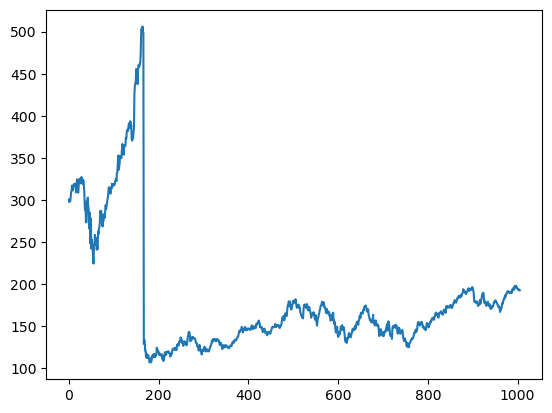

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
df1

0       300.35
1       297.43
2       299.80
3       298.39
4       303.19
         ...  
1001    193.60
1002    193.05
1003    193.15
1004    193.58
1005    192.53
Name: close, Length: 1006, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.48468378],
       [0.47737007],
       [0.4833062 ],
       ...,
       [0.21618034],
       [0.21725736],
       [0.21462743]])

Splitting dataset into train and test 

In [14]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train , y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [18]:
print(X_test.shape), print(y_test.shape)

(252, 100)
(252,)


(None, None)

Reshape input to be [samples, time steps, features] #3d array which is required for LSTM

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [20]:
#creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose =1 )

Epoch 1/100
9/9 [==============================] - 9s 290ms/step - loss: 0.0360 - val_loss: 0.0036
Epoch 2/100
9/9 [==============================] - 1s 145ms/step - loss: 0.0187 - val_loss: 9.8512e-04
Epoch 3/100
9/9 [==============================] - 1s 150ms/step - loss: 0.0142 - val_loss: 8.2512e-04
Epoch 4/100
9/9 [==============================] - 1s 153ms/step - loss: 0.0112 - val_loss: 2.8154e-04
Epoch 5/100
9/9 [==============================] - 1s 157ms/step - loss: 0.0097 - val_loss: 2.2853e-04
Epoch 6/100
9/9 [==============================] - 1s 141ms/step - loss: 0.0088 - val_loss: 7.0820e-04
Epoch 7/100
9/9 [==============================] - 1s 148ms/step - loss: 0.0083 - val_loss: 1.8727e-04
Epoch 8/100
9/9 [==============================] - 1s 139ms/step - loss: 0.0072 - val_loss: 2.5791e-04
Epoch 9/100
9/9 [==============================] - 1s 150ms/step - loss: 0.0069 - val_loss: 7.5486e-04
Epoch 10/100
9/9 [==============================] - 1s 138ms/step - loss: 0.0

In [27]:
#lets do the prediction and check performance metrices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 0s 27ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

190.15265575476081

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

167.66856898333478

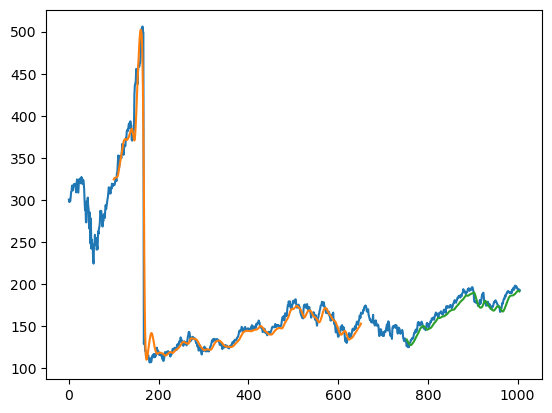

In [32]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Now we have to predict the next upcoming days data 

In [33]:
len(test_data) 

353

hereyou can see total data is 353 and we will take last 100 days to predict the next upcoming day

In [34]:
x_input = test_data[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [ ]:
temp_input

In [38]:
from numpy import array

lst_output=[]
n_steps = 100
i=0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat  = model.predict(x_input, verbose = 0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        x_input = x_input.reshape ((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.20940927]
101
1 day input [0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621 0.16874139
 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.2

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt 

In [41]:
len(df1)

1006

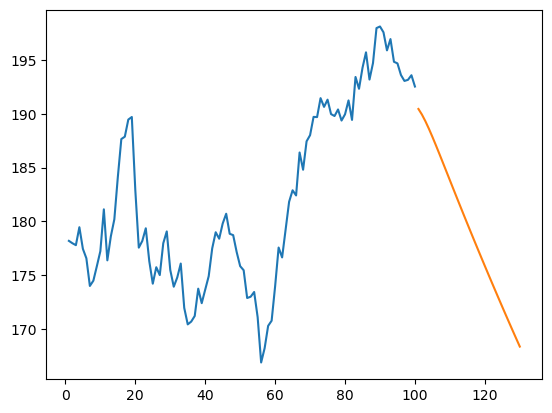

In [44]:
plt.plot(day_new, scaler.inverse_transform(df1[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

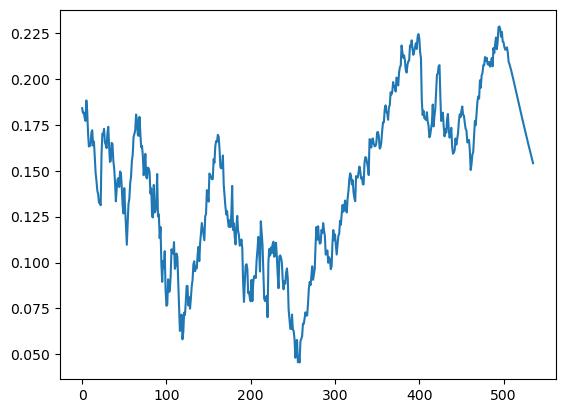

In [47]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])